# Project 3 - CIFAR10 딥러닝 모델

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from tensorflow.keras.datasets import cifar10

In [2]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=2023)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [3]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

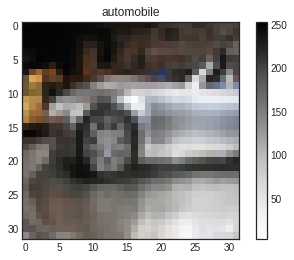

In [4]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.title(class_names[y_train[0][0]])
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [5]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [7]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [8]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(x_train.shape[1], )))
model.add(layers.Dense(2048))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(class_names), activation='softmax'))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              6293504   
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
activation (Activation)      (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0

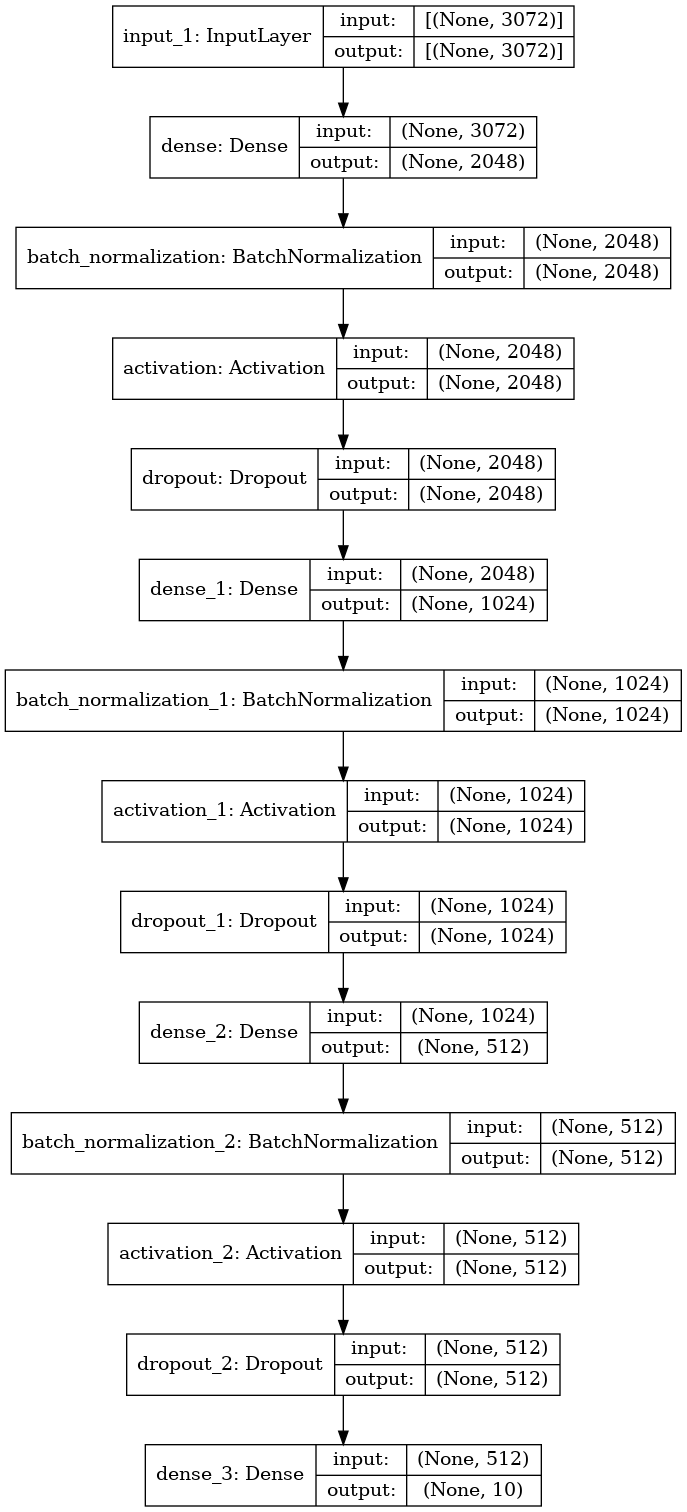

In [9]:
model.summary()
utils.plot_model(model, show_shapes=True)

In [10]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

check_point_cb = callbacks.ModelCheckpoint('cifar10_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(x_train,
                    y_train,
                    batch_size=512,
                    epochs=800,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/800
79/79 [==============================] - 3s 18ms/step - loss: 2.6546 - accuracy: 0.1555 - val_loss: 2.1525 - val_accuracy: 0.1900
Epoch 2/800
79/79 [==============================] - 1s 11ms/step - loss: 2.3736 - accuracy: 0.2166 - val_loss: 2.0228 - val_accuracy: 0.2620
Epoch 3/800
79/79 [==============================] - 1s 11ms/step - loss: 2.2444 - accuracy: 0.2494 - val_loss: 1.9066 - val_accuracy: 0.3185
Epoch 4/800
79/79 [==============================] - 1s 11ms/step - loss: 2.1539 - accuracy: 0.2684 - val_loss: 1.8407 - val_accuracy: 0.3429
Epoch 5/800
79/79 [==============================] - 1s 10ms/step - loss: 2.0961 - accuracy: 0.2821 - val_loss: 1.7685 - val_accuracy: 0.3697
Epoch 6/800
79/79 [==============================] - 1s 11ms/step - loss: 2.0481 - accuracy: 0.2900 - val_loss: 1.7395 - val_accuracy: 0.3790
Epoch 7/800
79/79 [==============================] - 1s 11ms/step - loss: 2.0047 - accuracy: 0.3018 - val_loss: 1.7017 - val_accuracy: 0.3961
Epoch 

79/79 [==============================] - 1s 11ms/step - loss: 1.5083 - accuracy: 0.4562 - val_loss: 1.4620 - val_accuracy: 0.4770
Epoch 59/800
79/79 [==============================] - 1s 11ms/step - loss: 1.5066 - accuracy: 0.4590 - val_loss: 1.4841 - val_accuracy: 0.4746
Epoch 60/800
79/79 [==============================] - 1s 10ms/step - loss: 1.4992 - accuracy: 0.4615 - val_loss: 1.4455 - val_accuracy: 0.4822
Epoch 61/800
79/79 [==============================] - 1s 10ms/step - loss: 1.4878 - accuracy: 0.4633 - val_loss: 1.4659 - val_accuracy: 0.4745
Epoch 62/800
79/79 [==============================] - 1s 10ms/step - loss: 1.4934 - accuracy: 0.4619 - val_loss: 1.4519 - val_accuracy: 0.4827
Epoch 63/800
79/79 [==============================] - 1s 10ms/step - loss: 1.4901 - accuracy: 0.4620 - val_loss: 1.4328 - val_accuracy: 0.4855
Epoch 64/800
79/79 [==============================] - 1s 10ms/step - loss: 1.4876 - accuracy: 0.4658 - val_loss: 1.4458 - val_accuracy: 0.4851
Epoch 65/800

79/79 [==============================] - 1s 11ms/step - loss: 1.3396 - accuracy: 0.5191 - val_loss: 1.3586 - val_accuracy: 0.5177
Epoch 116/800
79/79 [==============================] - 1s 10ms/step - loss: 1.3406 - accuracy: 0.5192 - val_loss: 1.3619 - val_accuracy: 0.5154
Epoch 117/800
79/79 [==============================] - 1s 10ms/step - loss: 1.3372 - accuracy: 0.5182 - val_loss: 1.3539 - val_accuracy: 0.5129
Epoch 118/800
79/79 [==============================] - 1s 10ms/step - loss: 1.3348 - accuracy: 0.5205 - val_loss: 1.3503 - val_accuracy: 0.5182
Epoch 119/800
79/79 [==============================] - 1s 10ms/step - loss: 1.3334 - accuracy: 0.5186 - val_loss: 1.3693 - val_accuracy: 0.5145
Epoch 120/800
79/79 [==============================] - 1s 10ms/step - loss: 1.3278 - accuracy: 0.5212 - val_loss: 1.3375 - val_accuracy: 0.5225
Epoch 121/800
79/79 [==============================] - 1s 11ms/step - loss: 1.3297 - accuracy: 0.5197 - val_loss: 1.3732 - val_accuracy: 0.5150
Epoch 

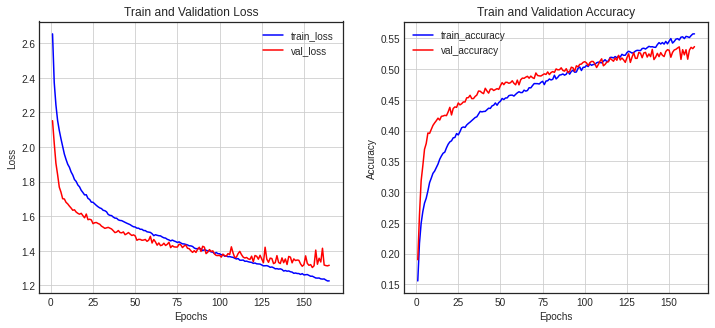

In [11]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [12]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.2888 - accuracy: 0.5374


[1.288806438446045, 0.5374000072479248]